# This idea is from Jeff!
### Goal: build a (2D) continum model (treating vapor and liquid as a mixture)
### We still capture the pressure and velocity information, tempereature can correlate to pressure if assuming saturated
### for a typical configuration below, the continum is non isotropic: pressure propagates in x dir, y dir is coupled by some heat equations alone
### properties such as pressure propagation is determien by the lengths

In [1]:
using OscillatingHeatPipe # our main package
using Plots # for plotting
using ProgressMeter # to have a progress bar in the calculation

In [56]:
Δx = 0.0007 # [m]

Lx = 6*INCHES*1.02; # plate size x [m]
Ly = 2*INCHES*1.05; # plate size y [m]
xlim = (-Lx/2,Lx/2) # plate x limits
ylim = (-Ly/2,Ly/2) # plate y limits

g = PhysicalGrid(1.03 .* xlim,1.1 .* ylim,Δx); # build a gird slightly larger than the plate

In [57]:
Δs = 1.4*cellsize(g)

trim = 0.006
cond_block = 1.1INCHES
# xbound = [ -Lx/2,-Lx/2, -Lx/2+cond_block,-Lx/2+cond_block, Lx/2-cond_block,  Lx/2-cond_block, 
#             Lx/2, Lx/2,  Lx/2-cond_block, Lx/2-cond_block,-Lx/2+cond_block, -Lx/2+cond_block];
# ybound = [  Ly/2,-Ly/2, -Ly/2,           -Ly/2+trim,      -Ly/2+trim,       -Ly/2, 
#            -Ly/2, Ly/2,  Ly/2,            Ly/2-trim ,      Ly/2-trim,        Ly/2 ];
xbound = [ -Lx/2,-Lx/2, 
            Lx/2, Lx/2];
ybound = [  Ly/2,-Ly/2, 
           -Ly/2, Ly/2];
body = Polygon(xbound,ybound,Δs)

Closed polygon with 4 vertices and 426 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [11]:
Δx = 0.0007 # [m]
ds = 1.5Δx
        nturn = 11
        width_ohp = 40.25*1e-3
        length_ohp = 110.0*1e-3
        gap = ee-3
        pitch = width_ohp/(2*nturn+1)
        x0, y0 = length_ohp/2 +2e-3, width_ohp/2

    x, y, xf, yf = construct_ohp_curve(nturn,pitch,length_ohp,gap,ds,x0,y0,false,false,3pi/2)
    
ohp = BasicBody(x,y) # build a BasicBody based on x,y


Basic pointwise-specified body with 2583 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


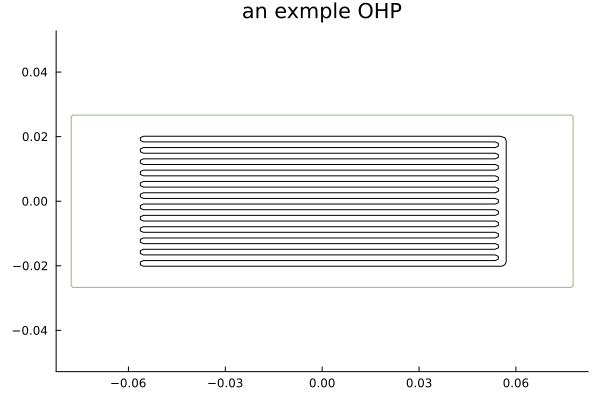

In [64]:
plot(body,fill=false)
plot!(ohp,closedornot=true,color=:black,title="an exmple OHP")

In [47]:
xs = Vector(range(-0.02,0.02,22))

22-element Vector{Float64}:
 -0.02
 -0.018095238095238095
 -0.01619047619047619
 -0.014285714285714285
 -0.012380952380952381
 -0.010476190476190476
 -0.008571428571428572
 -0.006666666666666667
 -0.004761904761904762
 -0.002857142857142857
 -0.0009523809523809524
  0.0009523809523809524
  0.002857142857142857
  0.004761904761904762
  0.006666666666666667
  0.008571428571428572
  0.010476190476190476
  0.012380952380952381
  0.014285714285714285
  0.01619047619047619
  0.018095238095238095
  0.02

In [52]:
evenoddy = hcat(xs,xs)'

2×22 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.02  -0.0180952  -0.0161905  -0.0142857  …  0.0161905  0.0180952  0.02
 -0.02  -0.0180952  -0.0161905  -0.0142857     0.0161905  0.0180952  0.02

In [60]:
evenoddy[:,1:2:end]
xs = [-0.05;0.05]

2-element Vector{Float64}:
 -0.05
  0.05

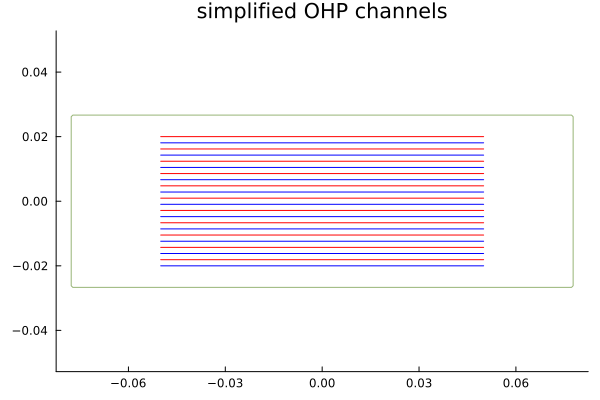

In [62]:
plot(body,fill=false)
plot!(xs,evenoddy[:,1:2:end],linecolor=:blue,legend = false,title="simplified OHP channels")
plot!(xs,evenoddy[:,2:2:end],linecolor=:red)

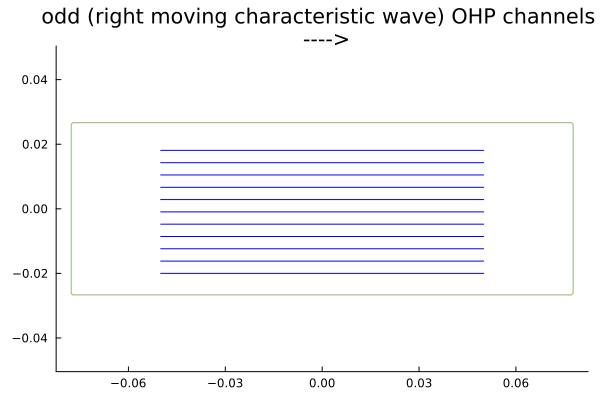

In [72]:
plot(body,fill=false)
plot!(xs,evenoddy[:,1:2:end],linecolor=:blue,legend = false,title="odd (right moving characteristic wave) OHP channels \n ---->")

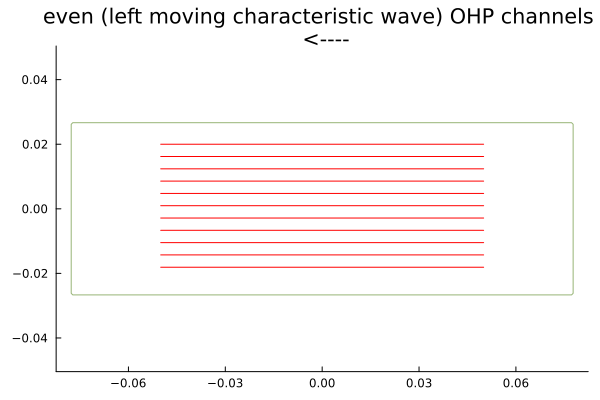

In [74]:
plot(body,fill=false)
plot!(xs,evenoddy[:,2:2:end],linecolor=:red,legend = false,title="even (left moving characteristic wave) OHP channels \n <----")